# 로컬 개발 코드
- 로컬에서 주피터 노트북(Jupyter Notebook), 주피터 랩(JupyterLab) 또는 파이썬(Python)을 이용한다. 
- 사이킷 런(scikit-learn), 텐서플로우(tensorflow), 파이토치(pytorch)를 사용하여 딥러닝 프로그램을 개발한다.
- 파일명: 0_local_text_generation.ipynb

### 로컬 개발 워크플로우(workflow)  
- 로컬 개발 워크플로우를 다음의 4단계로 분리한다.

1. **데이터셋 준비(Data Setup)**
- 로컬 저장소에서 전처리 및 학습에 필요한 학습 데이터셋을 준비한다.

2. **데이터 전처리(Data Preprocessing)**
- 데이터셋의 분석 및 정규화(Normalization)등의 전처리를 수행한다.
- 데이터를 모델 학습에 사용할 수 있도록 가공한다.
- 추론과정에서 필요한 경우, 데이터 전처리에 사용된 객체를 meta_data 폴더 아래에 저장한다.

3. **학습 모델 훈련(Train Model)**
- 데이터를 훈련에 사용할 수 있도록 가공한 뒤에 학습 모델을 구성한다. 
- 학습 모델을 준비된 데이터셋으로 훈련시킨다.
- 정확도(Accuracy)나 손실(Loss)등 학습 모델의 성능을 검증한다.
- 학습 모델의 성능 검증 후, 학습 모델을 배포한다.
- 배포할 학습 모델을 meta_data 폴더 아래에 저장한다.

4. **추론(Inference)**
- 저장된 전처리 객체나 학습 모델 객체를 준비한다.
- 추론에 필요한 테스트 데이터셋을 준비한다.
- 배포된 학습 모델을 통해 테스트 데이터에 대한 추론을 진행한다. 

# 승하차 분류 (Classification)
- 지금부터 skeleton points를 이용하여 승하차 분류 (classification)을 진행해보고자 한다.

## 승하차

### 사용할 데이터

- aihub에서 제공하는 Open Dataset 
- 해당 데이터셋은 원천 데이터인 이미지 데이터와 annotations 정보를 가진 json 파일들로 이루어져 있다.

### 사용할 4개의 annotations 정보
- keypoints
- get_on
- get_off
- action

## **1. 데이터셋 준비(Data Setup)**

In [3]:
# 모듈 로딩
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

from keras.layers import Dropout, Flatten, LSTM, Bidirectional, Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPool2D

In [5]:
C3_downtown = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_3/downtown/'
C3_supermarket = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_3/supermarket/'
C3_village = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_3/village/'
A1_apt = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_1/apt/'
A1_etc = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_1/etc/'
A1_supermarket = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_1/supermarket/'
A2_apt = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_2/apt/'
A2_hospital = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_2/hospital/'
A2_village = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_2/village/'
A3_downtown = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_3/downtown/'
A3_mid_high = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_3/mid_high/'
A3_subway = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_3/subway/'
A3_university = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_A_3/university/'
B1_district = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_1/district/'
B1_etc = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_1/etc/'
B1_hospital = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_1/hospital/'
B2_downtown = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_2/downtown/'
B2_mid_high = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_2/mid_high/'
B2_university = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_2/university/'
B3_ele = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_3/ele/'
B3_supermarket = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_3/supermarket/'
B3_village = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_B_3/village/'
C1_apt = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_1/apt/'
C2_ele = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/ele/'
C2_etc = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/etc/'
C2_hospital = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/hospital/'
C2_mid_high = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/mid_high/'
C2_university = 'C:/Users/USER/Desktop/승하차 데이터/[라벨]General_train_C_2/university/'

In [13]:
def make_df(path):
    bbox = []
    keypoints = []
    action = []
    get_on = []
    get_off = []
    for i in tqdm(os.listdir(path)):
        os.listdir(path+i)
        file_list = os.listdir(path+i)
       
        for a in file_list:
            with open ((path+i+'/'+a),"r") as j:
                contents = json.loads(j.read())
                if len(contents['annotations']) != 0:
                    for idx in range(len(contents['annotations'])):
                            bbox.append(contents['annotations'][idx]['bbox'])
                            keypoints.append(contents['annotations'][idx]['keypoints'])
                            action.append(contents['annotations'][idx]['action'])
                            get_on.append(contents['annotations'][idx]['get_on'])
                            get_off.append(contents['annotations'][idx]['get_off'])
    df = pd.DataFrame({'bbox':bbox,
                       'keypoints':keypoints,
                       'action':action,
                       'get_on':get_on,
                       'get_off':get_off})
    get = []
    action_num = []
    for i in tqdm(range(len(df['get_on']))):
        if (list(df['get_on'])[i] == False) and (list(df['get_off'])[i] == False):
            get.append(2)
        elif (list(df['get_on'])[i] == True) and (list(df['get_off'])[i] == False):
            get.append(1)
        else:
            get.append(0)
    df['get'] = get
    
    for i in tqdm(range(len(df['action']))):
        if list(df['action'])[i] == 'stand':
            action_num.append(0) 
        elif list(df['action'])[i] == 'walk':
            action_num.append(1)
        elif list(df['action'])[i] == 'run':
            action_num.append(2)
        elif list(df['action'])[i] == 'sit down':
            action_num.append(3)
        elif list(df['action'])[i] == 'lay down':
            action_num.append(4)
        elif list(df['action'])[i] == 'grab handle':
            action_num.append(5)
        elif list(df['action'])[i] == 'kick':
            action_num.append(6)
        else:
            action_num.append(7)
    df['action_num'] = action_num
    
    return df 

In [ ]:
C3_downtown_df = make_df(C3_downtown)
C3_supermarket_df = make_df(C3_supermarket)
C3_village_df = make_df(C3_village)
A1_apt_df = make_df(A1_apt)
A1_etc_df = make_df(A1_etc)
A1_supermarket_df = make_df(A1_supermarket)
A2_apt_df = make_df(A2_apt)
A2_hospital_df = make_df(A2_hospital)
A2_village_df = make_df(A2_village)
A3_downtown_df = make_df(A3_downtown)
A3_mid_high_df = make_df(A3_mid_high)
A3_subway_df = make_df(A3_subway)
A3_university_df = make_df(A3_university)
B1_district_df = make_df(B1_district)
B1_etc_df = make_df(B1_etc)
B1_hospital_df = make_df(B1_hospital)
B2_downtown_df = make_df(B2_downtown)
B2_mid_high_df = make_df(B2_mid_high)
B2_university_df = make_df(B2_university)
B3_ele_df = make_df(B3_ele)
B3_supermarket_df = make_df(B3_supermarket)
B3_village_df = make_df(B3_village)
C1_apt_df = make_df(C1_apt)
C2_ele_df = make_df(C2_ele)
C2_etc_df = make_df(C2_etc)
C2_hospital_df = make_df(C2_hospital)
C2_mid_high_df = make_df(C2_mid_high)
C2_university_df = make_df(C2_university)

In [44]:
bus_df = pd.concat([A1_apt_df,A1_etc_df,A1_supermarket_df,A2_apt_df,
                   A2_hospital_df,A2_village_df,A3_downtown_df,A3_mid_high_df,A3_subway_df,A3_university_df,B1_district_df,
                   B1_etc_df,B1_hospital_df,B2_downtown_df,B2_mid_high_df,B2_university_df,B3_ele_df,B3_supermarket_df,
                   B3_village_df,C1_apt_df,C2_ele_df,C2_etc_df,C2_hospital_df,C2_mid_high_df,C2_university_df,C3_downtown_df,C3_supermarket_df,C3_village_df])

In [45]:
bus_df.to_csv('./getonoff(train).csv', index=False, encoding='cp949')

In [4]:
df = pd.read_csv('./getonoff(train).csv')

In [5]:
df

,bbox,keypoints,action,get_on,get_off,get,action_num
0,"[974, 266, 1471, 1077]","[1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 12...",stand,True,False,1,0
1,"[1017, 224, 1452, 1060]","[1094, 918, 2, 1131, 802, 2, 1185, 643, 2, 131...",stand,True,False,1,0
2,"[1007, 224, 1445, 1049]","[1085, 909, 2, 1118, 787, 2, 1174, 634, 2, 129...",stand,True,False,1,0
3,"[1007, 222, 1428, 1049]","[1082, 908, 2, 1113, 786, 2, 1155, 627, 2, 127...",stand,True,False,1,0
4,"[995, 220, 1421, 1044]","[1071, 904, 2, 1102, 782, 2, 1144, 623, 2, 127...",stand,True,False,1,0
...,...,...,...,...,...,...,...
803900,"[706, 338, 905, 897]","[801, 834, 1, 797, 746, 1, 811, 649, 2, 849, 6...",stand,False,True,0,0
803901,"[1118, 242, 1282, 622]","[1135, 596, 1, 1148, 472, 1, 1160, 432, 1, 123...",sit down,False,False,2,3
803902,"[587, 235, 731, 603]","[626, 574, 1, 605, 456, 1, 635, 411, 2, 690, 4...",sit down,False,False,2,3
803903,"[688, 217, 870, 672]","[719, 604, 2, 714, 479, 2, 756, 429, 1, 844, 4...",sit down,False,False,2,3


In [6]:
df['get'].value_counts()

2    497094
0    191823
1    114988
Name: get, dtype: int64

In [7]:
df

,bbox,keypoints,action,get_on,get_off,get,action_num
0,"[974, 266, 1471, 1077]","[1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 12...",stand,True,False,1,0
1,"[1017, 224, 1452, 1060]","[1094, 918, 2, 1131, 802, 2, 1185, 643, 2, 131...",stand,True,False,1,0
2,"[1007, 224, 1445, 1049]","[1085, 909, 2, 1118, 787, 2, 1174, 634, 2, 129...",stand,True,False,1,0
3,"[1007, 222, 1428, 1049]","[1082, 908, 2, 1113, 786, 2, 1155, 627, 2, 127...",stand,True,False,1,0
4,"[995, 220, 1421, 1044]","[1071, 904, 2, 1102, 782, 2, 1144, 623, 2, 127...",stand,True,False,1,0
...,...,...,...,...,...,...,...
803900,"[706, 338, 905, 897]","[801, 834, 1, 797, 746, 1, 811, 649, 2, 849, 6...",stand,False,True,0,0
803901,"[1118, 242, 1282, 622]","[1135, 596, 1, 1148, 472, 1, 1160, 432, 1, 123...",sit down,False,False,2,3
803902,"[587, 235, 731, 603]","[626, 574, 1, 605, 456, 1, 635, 411, 2, 690, 4...",sit down,False,False,2,3
803903,"[688, 217, 870, 672]","[719, 604, 2, 714, 479, 2, 756, 429, 1, 844, 4...",sit down,False,False,2,3


## 2. 데이터 전처리 (Data Preprocessing)

### 데이터 준비 (Preparing Data)

앞서 확인하고 분석한 numpy array들을 훈련에 사용할 수 있는 형태로 바꾸고자 한다.

- 데이터 전처리
  - skeleton 좌표인 16개의 keypoints가 각각의 list에 들어가 있다. '[','[' 문자를 제거하고 하나의 list로 만들어준다. (strip)
  - train, test data 분리 위해 리스트를 2차원 배열로 만든다.
- 훈련 (train) & 평가 (test) 데이터셋 생성
  - 전체 데이터 중 일부는 훈련 (train)에 사용하고, 나머지 일부는 훈련된 모델의 성능을 평가 (test)하기 위해 사용하고자 한다. (`train_test_split`)
- stratified k-fold 교차검증
  - label 데이터 불균형을 해결하기 위해 교차검증을 진행한다. (stratified k-fold)
  - 교차검증을 진행하기 위해 훈련 데이터 x_train을 DataFrame으로 만들어준다.

#### 데이터 전처리

In [8]:
# keypoints list 생성
keypoints_list = []
for i in tqdm(range(len(df['keypoints']))):
    keypoints_list.append(np.array(list(map(int,df.keypoints[i].strip('[').strip(']').split(',')))))
    
# train, test 분리 위해 list를 2차열 배열로 변경해준다.
keypoints2arr = np.array(keypoints_list)

100%|██████████| 803905/803905 [00:16<00:00, 49867.90it/s]


In [10]:
keypoints2arr.shape

(803905, 48)

##### 훈련 & 평가 데이터셋 생성

전체 데이터셋 중 **8:2**의 비율로 훈련:평가 데이터셋을 생성한다.

In [11]:
# train, test 데이터셋 생성
x_train,x_test,y_train,y_test=train_test_split(keypoints2arr,df['get'],
                                               test_size=0.2,
                                               random_state=42,
                                               shuffle=True)

#### stratified k-fold 교차검증

In [12]:
# 교차 검증 위해 DataFrame 변경
x_df = pd.DataFrame(x_train)

str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)

# 교차검증 accuracy 담을 list 생성 
acc_score = []

## **3. 학습 모델 훈련 (Train Model)**

승하차 분류를 위해 아주 간단한 CNN 모델을 Keras를 이용하여 구축하고자 한다.

In [17]:
# CNN 모델 구축
def model_CNN():

  model=Sequential()
  model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=(16, 1, 3))) # 3차원
  model.add(MaxPool2D(pool_size=2, padding='same'))
  
  model.add(Flatten()) # 1차원으로 데이터 형태 변환 Layer 
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax')) # get_on, get_of, nothing 출력
  
  return model

In [16]:
# EarlyStopping(val_loss 5회 이상 개선 없을시 멈춘다.)
patience = 5
stopCB = EarlyStopping(monitor='val_loss', patience=patience)

# ModelCheckpoint는 모델이 학습하면서 정의한 조건을 만족했을 때 Model의 weight 값을 중간 저장.
MODEL_DIR = './model/'               # 모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR):    # 만일 위의 폴더가 존재하지 않으면
    os.mkdir(MODEL_DIR)              # 이 이름의 폴더를 만들어준다.
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5' # epoch-val_loss 이름으로 저장

checkpointer = ModelCheckpoint(filepath=modelpath,  # file명 지정
                               monitor ='val_loss', # val_loss 값이 개선 되었을때 호출
                               verbose=1,           # 로그 출력 
                               save_best_only=True) # val_loss best 값 저장

### 모델 컴파일 및 학습 (Compile and Train Model)

- 모델 컴파일 (Compile Model)
  - Keras의 compile 함수를 통해 모델의 optimizer, loss, 그리고 metrics를 선택할 수 있다.
  - Loss: categoriacal_crossentropy
    - 우리는 레이블로 one-hot-encoding을 사용했으므로 loss로 'categorical_crossentropy'를 사용한다.
- 모델 학습 (Train Model)
  - 앞서 구축한 모델을 준비해준 입력 데이터와 레이블 데이터로 학습시킨다.

Epoch 1/30
4019/4020 [============================>.] - ETA: 0s - loss: 0.7157 - accuracy: 0.7641
Epoch 1: val_loss improved from inf to 0.50144, saving model to ./model11/01-0.5014.hdf5
4020/4020 [==============================] - 17s 4ms/step - loss: 0.7157 - accuracy: 0.7642 - val_loss: 0.5014 - val_accuracy: 0.8091
Epoch 2/30
4018/4020 [============================>.] - ETA: 0s - loss: 0.5056 - accuracy: 0.8129
Epoch 2: val_loss improved from 0.50144 to 0.45949, saving model to ./model11/02-0.4595.hdf5
4020/4020 [==============================] - 17s 4ms/step - loss: 0.5057 - accuracy: 0.8129 - val_loss: 0.4595 - val_accuracy: 0.8284
Epoch 3/30
4009/4020 [============================>.] - ETA: 0s - loss: 0.4665 - accuracy: 0.8297
Epoch 3: val_loss improved from 0.45949 to 0.43849, saving model to ./model11/03-0.4385.hdf5
4020/4020 [==============================] - 17s 4ms/step - loss: 0.4664 - accuracy: 0.8297 - val_loss: 0.4385 - val_accuracy: 0.8344
Epoch 4/30
4019/4020 [=======

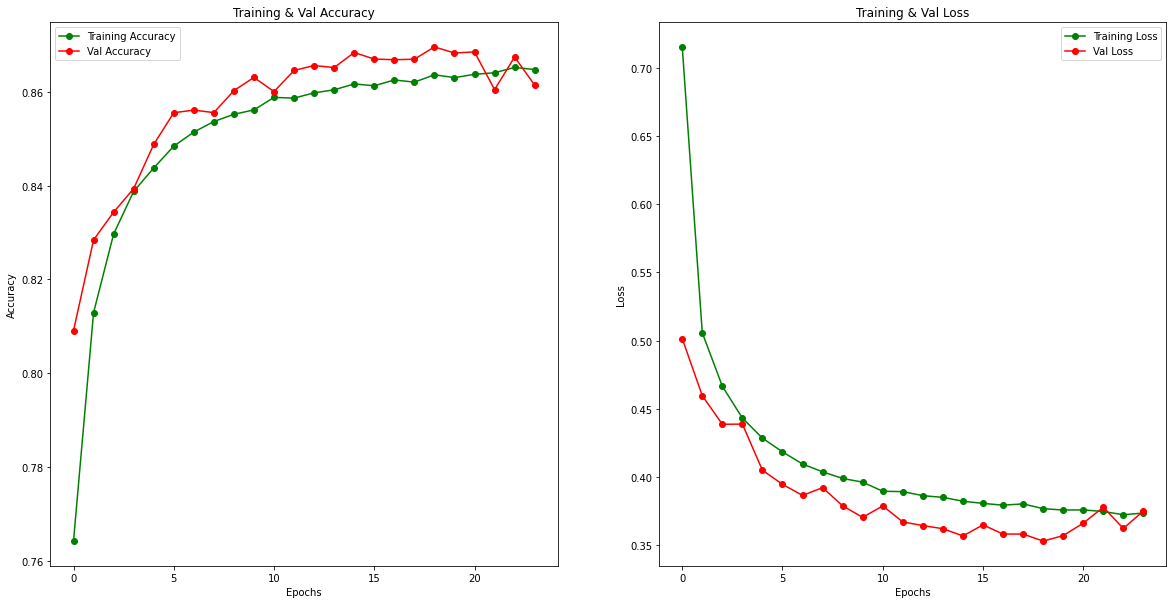

5025/5025 [==============================] - 9s 2ms/step
[[26879   832 10694]
 [ 1295 16764  4754]
 [ 3531   980 95052]]
0.8626330225586356
              precision    recall  f1-score   support

           0       0.85      0.70      0.77     38405
           1       0.90      0.73      0.81     22813
           2       0.86      0.95      0.90     99563

    accuracy                           0.86    160781
   macro avg       0.87      0.80      0.83    160781
weighted avg       0.86      0.86      0.86    160781

Epoch 1/30
4019/4020 [============================>.] - ETA: 0s - loss: 0.7453 - accuracy: 0.7657
Epoch 1: val_loss did not improve from 0.35269
4020/4020 [==============================] - 17s 4ms/step - loss: 0.7452 - accuracy: 0.7657 - val_loss: 0.5040 - val_accuracy: 0.8080
Epoch 2/30
4008/4020 [============================>.] - ETA: 0s - loss: 0.5081 - accuracy: 0.8110
Epoch 2: val_loss did not improve from 0.35269
4020/4020 [==============================] - 17s 4ms/st

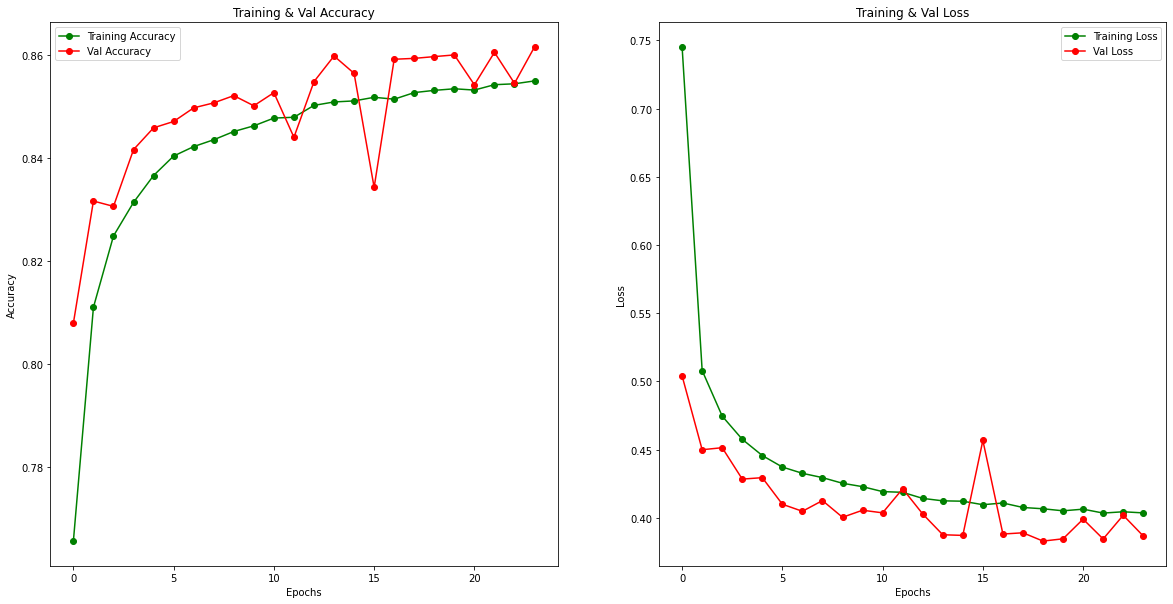

5025/5025 [==============================] - 9s 2ms/step
[[30494   549  7362]
 [ 1773 15869  5171]
 [ 6690   649 92224]]
0.8619613013975532
              precision    recall  f1-score   support

           0       0.78      0.79      0.79     38405
           1       0.93      0.70      0.80     22813
           2       0.88      0.93      0.90     99563

    accuracy                           0.86    160781
   macro avg       0.86      0.81      0.83    160781
weighted avg       0.86      0.86      0.86    160781

Epoch 1/30
4019/4020 [============================>.] - ETA: 0s - loss: 0.8089 - accuracy: 0.7541
Epoch 1: val_loss did not improve from 0.35269
4020/4020 [==============================] - 17s 4ms/step - loss: 0.8089 - accuracy: 0.7541 - val_loss: 0.5121 - val_accuracy: 0.8090
Epoch 2/30
4009/4020 [============================>.] - ETA: 0s - loss: 0.5071 - accuracy: 0.8126
Epoch 2: val_loss did not improve from 0.35269
4020/4020 [==============================] - 17s 4ms/st

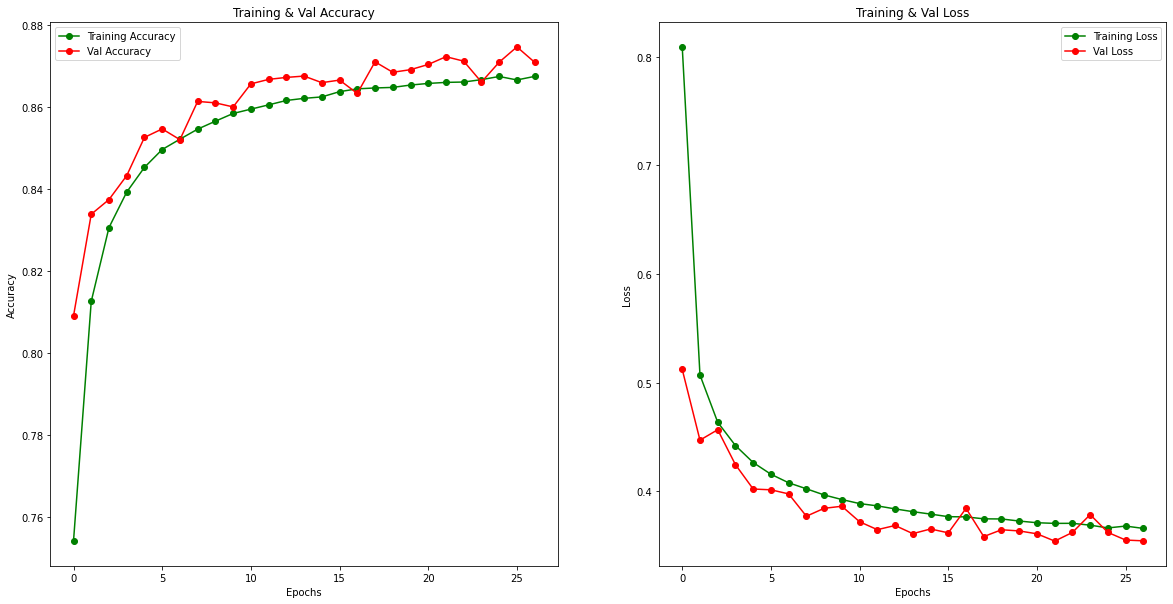

5025/5025 [==============================] - 9s 2ms/step
[[29938   539  7928]
 [ 1893 16425  4495]
 [ 5109   599 93855]]
0.8721055348579745
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     38405
           1       0.94      0.72      0.81     22813
           2       0.88      0.94      0.91     99563

    accuracy                           0.87    160781
   macro avg       0.88      0.81      0.84    160781
weighted avg       0.87      0.87      0.87    160781

Epoch 1/30
4017/4020 [============================>.] - ETA: 0s - loss: 0.7211 - accuracy: 0.7655
Epoch 1: val_loss did not improve from 0.35269
4020/4020 [==============================] - 18s 4ms/step - loss: 0.7210 - accuracy: 0.7655 - val_loss: 0.4865 - val_accuracy: 0.8129
Epoch 2/30
4016/4020 [============================>.] - ETA: 0s - loss: 0.5025 - accuracy: 0.8156
Epoch 2: val_loss did not improve from 0.35269
4020/4020 [==============================] - 17s 4ms/st

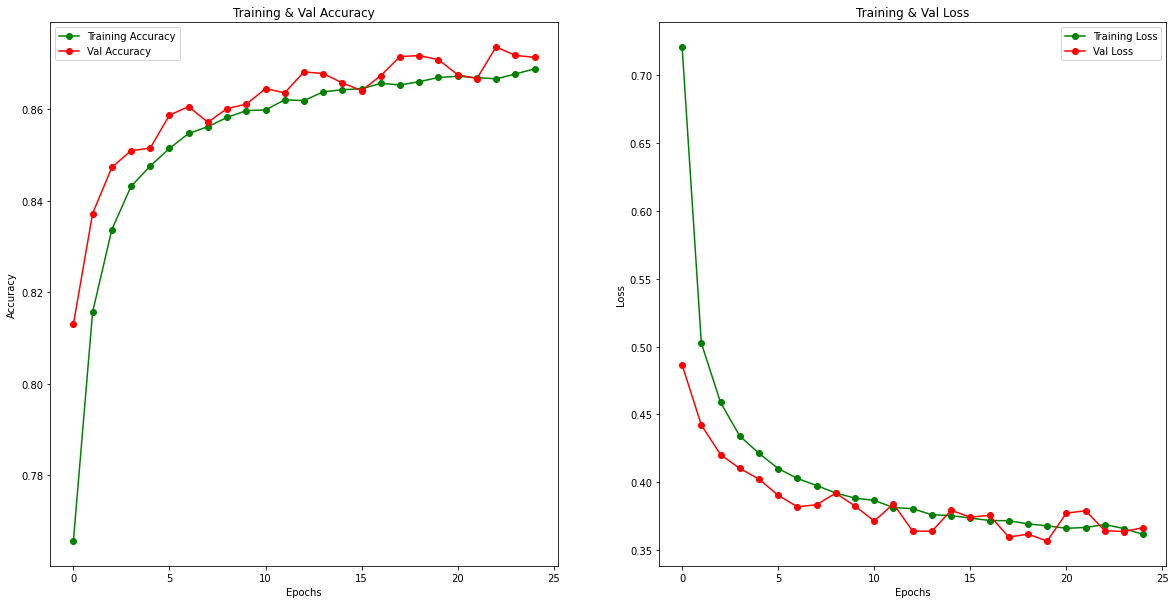

5025/5025 [==============================] - 9s 2ms/step
[[28771   825  8809]
 [ 1102 16879  4832]
 [ 4022   680 94861]]
0.8739278894894297
              precision    recall  f1-score   support

           0       0.85      0.75      0.80     38405
           1       0.92      0.74      0.82     22813
           2       0.87      0.95      0.91     99563

    accuracy                           0.87    160781
   macro avg       0.88      0.81      0.84    160781
weighted avg       0.87      0.87      0.87    160781

Epoch 1/30
4020/4020 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.7643
Epoch 1: val_loss did not improve from 0.35269
4020/4020 [==============================] - 17s 4ms/step - loss: 0.7050 - accuracy: 0.7643 - val_loss: 0.5163 - val_accuracy: 0.8033
Epoch 2/30
4010/4020 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.8124
Epoch 2: val_loss did not improve from 0.35269
4020/4020 [==============================] - 17s 4ms/st

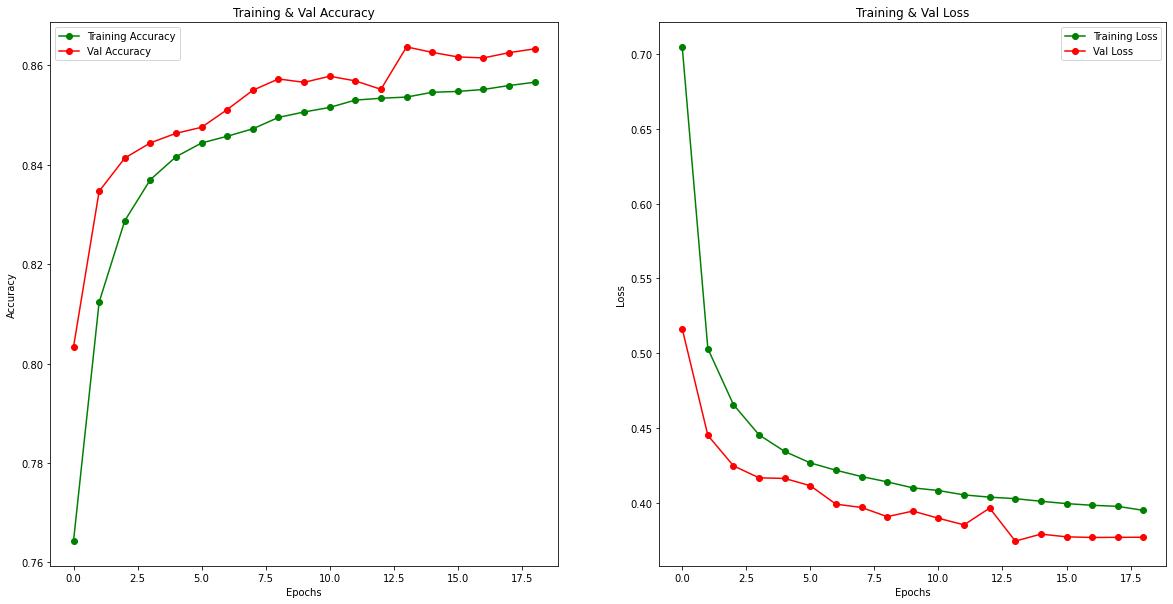

5025/5025 [==============================] - 9s 2ms/step
[[27949  1065  9391]
 [ 1121 16994  4698]
 [ 4428  1089 94046]]
0.8644615968304713
              precision    recall  f1-score   support

           0       0.83      0.73      0.78     38405
           1       0.89      0.74      0.81     22813
           2       0.87      0.94      0.91     99563

    accuracy                           0.86    160781
   macro avg       0.86      0.81      0.83    160781
weighted avg       0.86      0.86      0.86    160781



In [19]:
# 모델 학습(Train Model)
for train_index, test_index in str_kf.split(x_df, y_train): 
    X_train, X_val = x_df.iloc[train_index,:], x_df.iloc[test_index,:]  
    y_train2, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train = np.array(X_train).reshape(-1,16,1,3)
    y_train2 = to_categorical(y_train2, num_classes=3)
    X_val = np.array(X_val).reshape(-1,16,1,3)
    y_val = to_categorical(y_val, num_classes=3)    
    # 모델 컴파일(Compile Model)
    model = model_CNN()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(X_train,y_train2,epochs=30 ,batch_size=128,validation_data=(X_val,y_val),callbacks=[stopCB,checkpointer])
    # epoch 마다 train, validation의 accuracy, loss 시각화
    epochs = hist.epoch
    fig , ax = plt.subplots(1,2)
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    fig.set_size_inches(20,10)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Val Accuracy')
    ax[0].set_title('Training & Val Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Val Loss')
    ax[1].set_title('Training & Val Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    plt.show()
    # 모델 평가
    y_pred2 = model.predict(x_test.reshape(-1,16,1,3))
    y_pred2 = np.argmax(y_pred2, axis=1)
    y_test2 = np.argmax(to_categorical(y_test, num_classes=3), axis=1)
    
    print(confusion_matrix(y_test2,y_pred2))
    print(accuracy_score(y_test2,y_pred2))
    acc_score.append(accuracy_score(y_test2,y_pred2))
    print(classification_report(y_test2,y_pred2))

## **4. 추론 (Inference)**

훈련시킨 모델을 직접 사용해보고자 한다. 잘 훈련된 모델이라면 버스 승객의 승하차 영상을 입력 데이터로 주었을 때, 승하차 여부를 결과값으로 모델이 내보낼 것이다. 그 과정을 진행해보고자 한다.

In [9]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import load_model

In [2]:
hub_model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
movenet = hub_model.signatures['serving_default']

In [16]:
# main - 승하차
cap = cv2.VideoCapture('C:/Users/USER/project/movenet/버스승차영상.mp4')

get_state = ['get_on', 'get_off', 'nothing']

while cap.isOpened():
    ret, frame = cap.read()
    point_list = []
    
    if (ret): # frame capture 결과
        # frame = cv2.flip(frame,0) # 영상 뒤집혀서 출력되는 경우 사용
        img = frame.copy()
        img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 192, 256)
        input_img = tf.cast(img, dtype=tf.int32)

        results = movenet(input_img)
        keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6, 17, 3))

        loop_through_people(frame, keypoints_with_scores, EDGES, 0.2)

        # load model
        model = load_model('C:/Users/USER/project/movenet/19-0.3527(승하차CNN).hdf5')

        for point in point_list:
            if len(point) == 17: # keypoints가 다 잡혔을 때 결과값 예측
                # train model에 들어간 keypoints랑 movenet에 검출되는 keypoints 순서가 달라서 변환
                switch = [point[16], point[14], point[12], point[11], point[13], point[15], point[4], point[0], point[2], point[1],
                        point[10], point[8], point[6], point[5], point[7], point[9]]
                result = model.predict(np.array(switch).reshape(-1,16,1,3))
                cv2.putText(frame, get_state[result.argmax()], (point[0][0]-100, point[0][1]-100), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2, lineType=cv2.LINE_AA)
                print(get_state[result.argmax()])
        cv2.imshow('', frame)
            
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 51ms/step
get_off
1/1 [==============================] - 0s 50ms/step
get_off
1/1 [==============================] - 0s 38ms/step
get_on
1/1 [==============================] - 0s 45ms/step
nothing
1/1 [==============================] - 0s 47ms/step
get_on
1/1 [==============================] - 0s 46ms/step
get_on
1/1 [==============================] - 0s 48ms/step
get_on
1/1 [==============================] - 0s 46ms/step
get_on
1/1 [==============================] - 0s 47ms/step
get_on
1/1 [==============================] - 0s 49ms/step
get_on
1/1 [==============================] - 0s 46ms/step
get_on
1/1 [==============================] - 0s 48ms/step
get_on
1/1 [==============================] - 0s 45ms/step
nothing
1/1 [==============================] - 0s 46ms/step
nothing
1/1 [==============================] - 0s 46ms/step
nothing
1/1 [==============================] - 0s 45ms/step
nothing
1/1 [==============================] - 0s 47ms/st

In [4]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [13]:
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_lines(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

In [14]:
def draw_lines(frame, keypoints, edges, confidence_threshold):
    y, x, _ = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, _ in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

In [15]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, _ = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))

    i = 0
    points = []

    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0, 255, 0), -1)
            
            if i == 0:
                point_list.append(points)
            points.append((int(kx), int(ky), 0))
            i += 1